In [2]:
from keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt
import numpy.typing as npt
from activations import Activation

In [3]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [4]:
print(x_train.shape, (60000, 28, 28))
print(x_test.shape, (10000, 28, 28))
print(y_train.shape, (60000,))
print(y_test.shape, (10000,))

(60000, 28, 28) (60000, 28, 28)
(10000, 28, 28) (10000, 28, 28)
(60000,) (60000,)
(10000,) (10000,)


In [5]:
z = np.mean(x_train, axis=(1,2), keepdims=True)
z.shape

(60000, 1, 1)

In [6]:
normalizedX_train = (x_train - np.mean(x_train, axis=(1,2), keepdims=True))/np.std(x_train, axis=(1,2), keepdims=True)

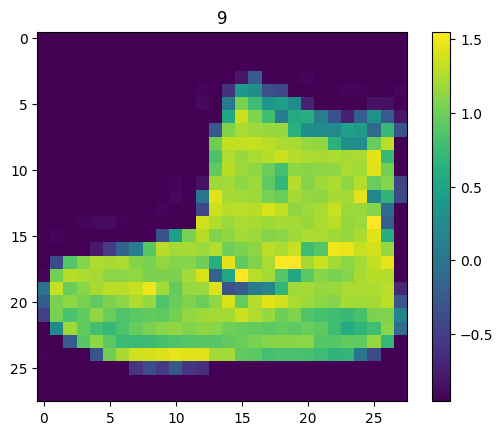

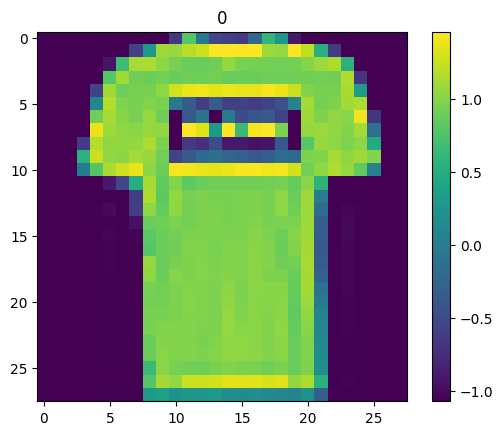

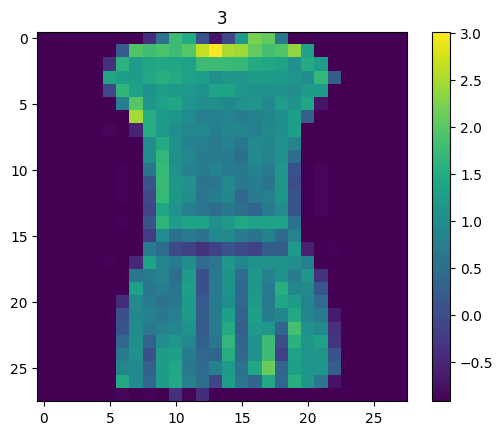

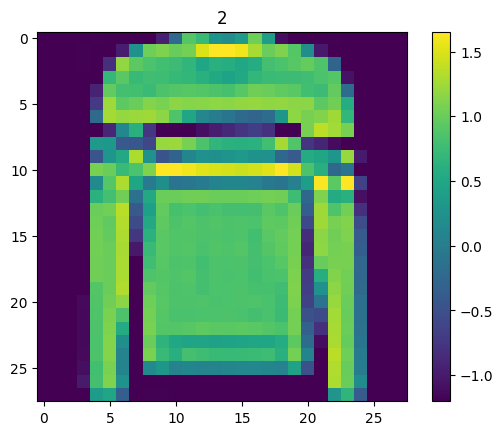

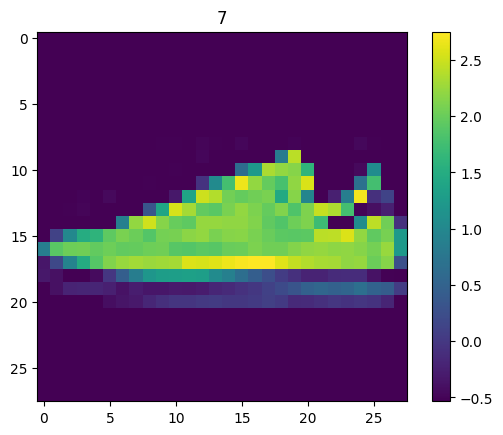

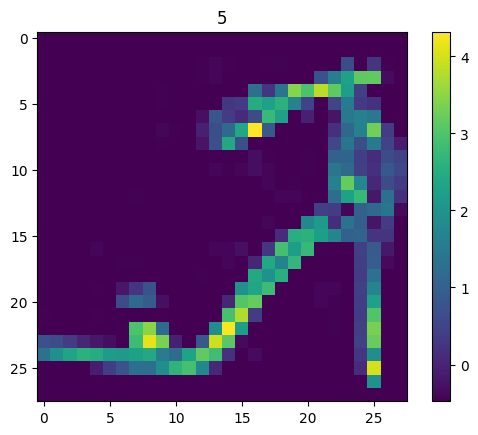

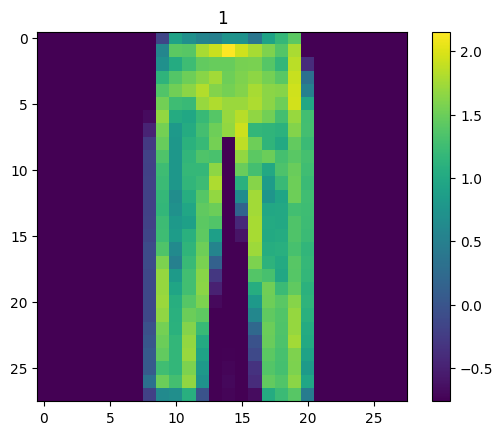

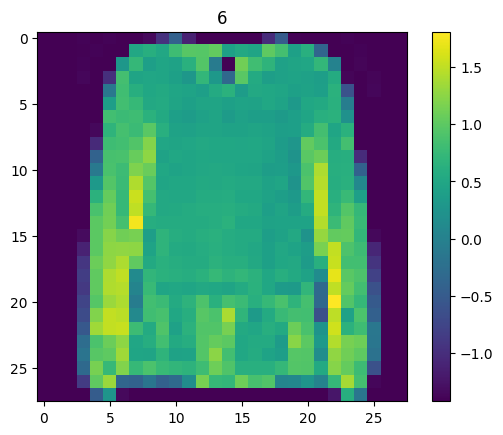

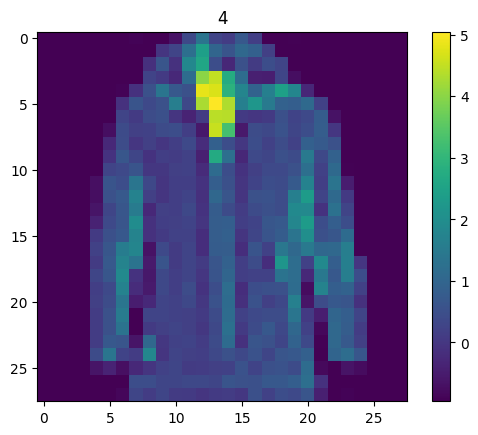

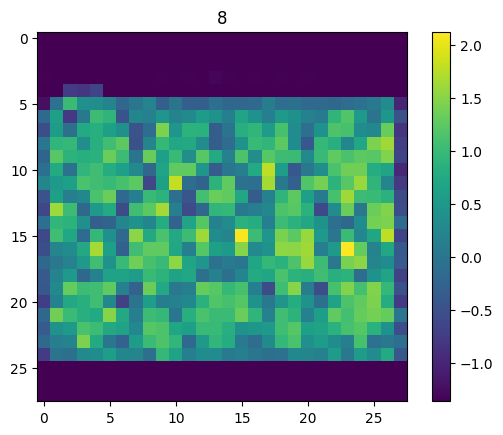

In [10]:
i = 0
hasAppeared = set(range(10))
for x in zip(normalizedX_train, y_train):
    if x[1] in hasAppeared:
        plt.imshow(x[0])
        plt.title(x[1])
        hasAppeared.remove(x[1])
        plt.colorbar()
        plt.show()

    i += 1

In [5]:
import numpy as np
X = [0.5,2.5]
Y = [0.2,0.9]

def f(x,w,b): 
  return 1/(1+np.exp(-(w*x+b)))

def error(w,b):
  err = 0.0
  for x,y in zip(X,Y):
    fx = f(x,w,b)
    err += (fx-y)**2
  return 0.5*err

def grad_b(x,w,b,y):
  fx = f(x,w,b)
  return (fx-y)*fx*(1-fx)

def grad_w(x,w,b,y):
  fx = f(x,w,b)
  return (fx-y)*fx*(1-fx)*x

def do_gradient_descent():
  w,b,eta,max_epochs = -2,-2,1.0,1000
  
  for i in range(max_epochs):
    if (i+1)%100 == 0:
      print(f"Epoch: {i+1}, MSE Loss: {error(w, b)}")
    dw,db = 0,0
    for x,y in zip(X,Y):
      dw += grad_w(x,w,b,y)
      db += grad_b(x,w,b,y)
    
    w = w - eta*dw
    b = b - eta*db

In [6]:
do_gradient_descent()

Epoch: 100, MSE Loss: 0.01861856808455869
Epoch: 200, MSE Loss: 0.0006367318398718886
Epoch: 300, MSE Loss: 5.831268986509278e-05
Epoch: 400, MSE Loss: 6.626448882300315e-06
Epoch: 500, MSE Loss: 8.047154507327037e-07
Epoch: 600, MSE Loss: 9.99455215936944e-08
Epoch: 700, MSE Loss: 1.251091629843558e-08
Epoch: 800, MSE Loss: 1.5704179564571685e-09
Epoch: 900, MSE Loss: 1.9731773913368342e-10
Epoch: 1000, MSE Loss: 2.4800903345200505e-11


In [9]:
from losses import mse, ce

y_real = np.random.rand(3,1)
y_real = y_real/np.sum(y_real)
print(y_real)
print(np.sum(y_real))

y_pred = np.random.rand(3,1)
y_pred = y_pred/np.sum(y_pred)
print(y_pred)
print(np.sum(y_pred))

print(f"Mean Squared Error =\t{mse(y_real, y_pred)}")
print(f"Cross Entropy =\t{ce(y_real, y_pred)}")

[[0.4517934 ]
 [0.38028911]
 [0.16791749]]
1.0000000000000002
[[0.14491891]
 [0.33289785]
 [0.52218324]]
1.0
Mean Squared Error =	0.07397403225571449
Cross Entropy =	1.4000651048389603


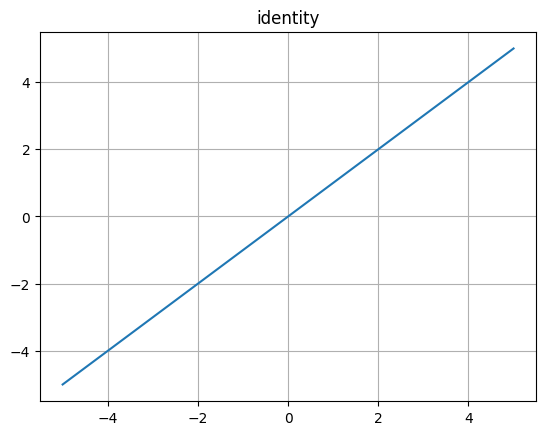

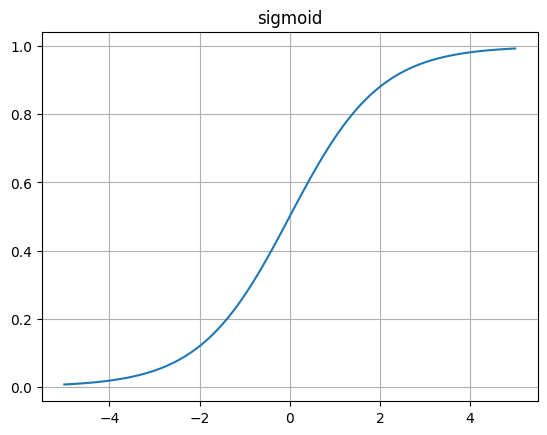

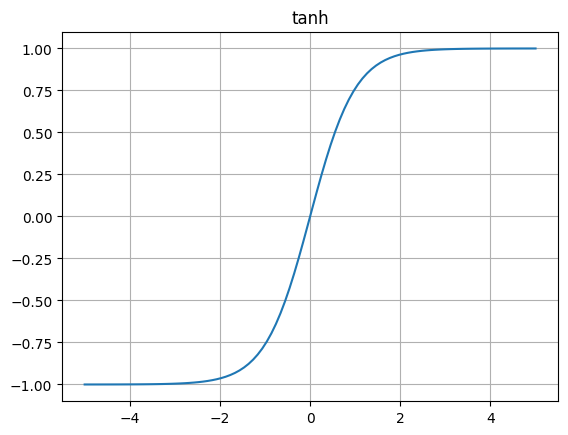

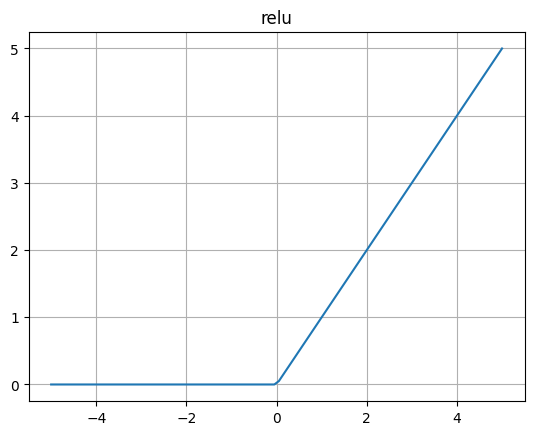

In [10]:
afs = ["identity", "sigmoid", "tanh", "relu"]


# note to self: this notebook was merged into main branch where the updated activation
# activation = Activation("softmax")
# x = np.linspace(-5,5,100)
# y = activation.function(x)
# plt.plot(x, y)
# plt.title("softmax")
# plt.grid(True)
# plt.show()

for af in afs:
    activation = Activation(af)
    x = np.linspace(-5,5,100)
    y = activation.function(x)
    plt.plot(x, y)
    plt.title(af)
    plt.grid(True)
    plt.show()

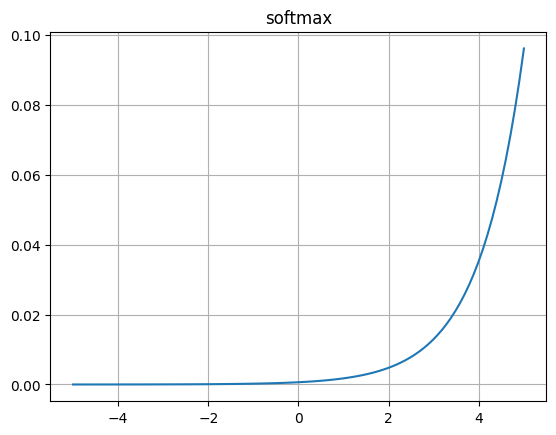

In [11]:
activ = Activation("softmax")
x = np.linspace(-5,5,100)
y = activ.function(x)
plt.plot(x, y)
plt.title("softmax")
plt.grid(True)
plt.show()